# Homework 6

## INF 552: Machine Learning for Data Informatics

### Jungho Choi (junghoch@usc.edu)

#### 1. Supervised, Semi-Supervised, and Unsupervised Learning

(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes. Use the first 20% of the positive and negative classes in the file as the test set and the rest as the training set.

In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold, GridSearchCV
from sklearn import preprocessing 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
wdbc_data = pd.read_csv('wdbc.data', sep=',', header=None, skiprows=0)
split_data = train_test_split(wdbc_data, test_size = 0.8, shuffle = False) # since first 20% of data split opposite way than the documentation and don't shuffle 
test_data = split_data[0]
train_data = split_data[1]
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
113,864292,B,10.510,20.19,68.64,334.2,0.11220,0.13030,0.06476,0.03068,...,11.160,22.75,72.62,374.4,0.1300,0.2049,0.1295,0.06136,0.2383,0.09026
114,864496,B,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.01924,...,9.628,19.62,64.48,284.4,0.1724,0.2364,0.2456,0.10500,0.2926,0.10170
115,864685,B,11.930,21.53,76.53,438.6,0.09768,0.07849,0.03328,0.02008,...,13.670,26.15,87.54,583.0,0.1500,0.2399,0.1503,0.07247,0.2438,0.08541
116,864726,B,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,...,9.414,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722
117,864729,M,14.870,16.67,98.64,682.5,0.11620,0.16490,0.16900,0.08923,...,18.810,27.37,127.10,1095.0,0.1878,0.4480,0.4704,0.20270,0.3585,0.10650


(b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative
classes as the test set). Then compare the average scores (accuracy, precision, recall, F-score, and AUC) that you obtain from each algorithm.

- i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [7]:
# normalize first 
df = wdbc_data 
x = df.drop([0, 1], axis = 1) # remove ID and classes first for normalization 
x = preprocessing.normalize(x)

# binarizer for auc score
lb = LabelBinarizer()

# model for supervised learning SVM with L1 Penalty 
k_folds = KFold(5) 
parameters={'C':[0.1,0.01,1,10,100,1000,10000]}
model_supervised = LinearSVC(penalty = 'l1', dual = False)

In [10]:
accuracy_train_list = [] 
accuracy_test_list = [] 

precision_train_list = [] 
precision_test_list = [] 

recall_train_list = [] 
recall_test_list = [] 

f1_train_list = [] 
f1_test_list = [] 

roc_score_train_list = [] 
roc_score_test_list = [] 

for i in range(30):
    # divide into necessary parts for each training and testing (X and y)
    X_train, X_test, y_train, y_test = train_test_split(x, df.iloc[:,1], test_size=0.2)
    
    gsc = GridSearchCV(model_supervised, parameters, cv=k_folds)
    gsc.fit(X_train, y_train)
    
    preds_supervised_train = pd.Series(gsc.predict(X_train))
    preds_supervised_test = pd.Series(gsc.predict(X_test))
    
    #accuracy
    accuracy_test = accuracy_score(y_test, preds_supervised_test)
    accuracy_train = accuracy_score(y_train, preds_supervised_train)
    
    accuracy_test_list.append(accuracy_test)
    accuracy_train_list.append(accuracy_train)
    
    #precision
    precision_test = precision_score(y_test, preds_supervised_test, average = "binary", pos_label='B')
    precision_train = precision_score(y_train, preds_supervised_train, average = "binary", pos_label='B')
    
    precision_test_list.append(precision_test)
    precision_train_list.append(precision_train)
    
    #recall 
    recall_test = recall_score(y_test, preds_supervised_test, average = "binary", pos_label='B')
    recall_train = recall_score(y_train, preds_supervised_train, average = "binary", pos_label='B')
    
    recall_test_list.append(recall_test)
    recall_train_list.append(recall_train)
    
    #f-score
    f1_test = f1_score(y_test, preds_supervised_test, average = "binary", pos_label='B')
    f1_train = f1_score(y_train, preds_supervised_train, average = "binary", pos_label='B')
    
    f1_test_list.append(f1_test)
    f1_train_list.append(f1_train)
    
    #auc 
    roc_score_test = roc_auc_score(lb.fit_transform(y_test), lb.fit_transform(preds_supervised_test))
    roc_score_train = roc_auc_score(lb.fit_transform(y_train), lb.fit_transform(preds_supervised_train))
    
    roc_score_test_list.append(roc_score_test)
    roc_score_train_list.append(roc_score_train)

Train

Average Accuracy: 0.984615384615
Average Precision: 0.983932388679
Average Recall: 0.991673044545
Average F-score: 0.987777030306
Average AUC: 0.98213984895

Sample Run for Train

Confusion Matrix
[[274   3]
 [  5 173]]


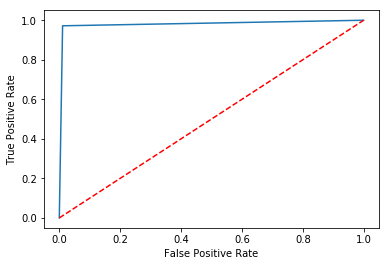

Area under the curve for ROC Curve above is 0.980539893725


In [26]:
print("Train")
print("")
print("Average Accuracy: " + str(np.mean(accuracy_train_list)))
print("Average Precision: " + str(np.mean(precision_train_list)))
print("Average Recall: " + str(np.mean(recall_train_list)))
print("Average F-score: " + str(np.mean(f1_train_list)))
print("Average AUC: " + str(np.mean(roc_score_train_list)))
print("")

print("Sample Run for Train")
print("")
conf_matrix_train = confusion_matrix(lb.fit_transform(y_train), lb.fit_transform(preds_supervised_train))
print("Confusion Matrix")
print(conf_matrix_train)
fpr_train, tpr_train, thresh_train = roc_curve(lb.fit_transform(y_train), lb.fit_transform(preds_supervised_train))
plt.figure() 
plt.plot(fpr_train, tpr_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
roc_score_train = roc_auc_score(lb.fit_transform(y_train), lb.fit_transform(preds_supervised_train))
print("Area under the curve for ROC Curve above is " + str(roc_score_train))

Test

Accuracy: 0.96432748538
Precision: 0.964711338258
Recall: 0.979033911772
F-score: 0.971635893954
AUC: 0.959443775356

Sample Run for Test: 

Confusion Matrix
[[80  0]
 [ 2 32]]


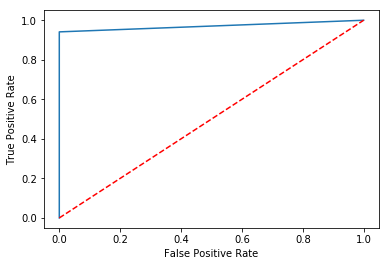

Area under the curve for ROC Curve above is 0.970588235294


In [27]:
print("Test")
print("")
print("Accuracy: " + str(np.mean(accuracy_test_list)))
print("Precision: " + str(np.mean(precision_test_list)))
print("Recall: " + str(np.mean(recall_test_list)))
print("F-score: " + str(np.mean(f1_test_list)))
print("AUC: " + str(np.mean(roc_score_test_list)))
print("")

print("Sample Run for Test: ")
print("")
conf_matrix_test = confusion_matrix(lb.fit_transform(y_test), lb.fit_transform(preds_supervised_test))
print("Confusion Matrix")
print(conf_matrix_test)
fpr_test, tpr_test, thresh_test = roc_curve(lb.fit_transform(y_test), lb.fit_transform(preds_supervised_test))
plt.figure() 
plt.plot(fpr_test, tpr_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
roc_score_test = roc_auc_score(lb.fit_transform(y_test), lb.fit_transform(preds_supervised_test))
print("Area under the curve for ROC Curve above is " + str(roc_score_test))

- ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

    - A. Train an L1-penalized SVM to classify the labeled data. Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [30]:
# normalize first 
df = wdbc_data 
x = df.drop([0, 1], axis = 1) # remove ID and classes first for normalization 
x = preprocessing.normalize(x)
frames = [pd.DataFrame(x), pd.DataFrame(df.iloc[:,1])]
x_and_Y = pd.concat(frames, axis = 1)
semi_data = train_test_split(x_and_Y, test_size = 0.8, shuffle = False) # since first 20% of data split opposite way than the documentation and don't shuffle 
semi_data_test = semi_data[0]
semi_data_train = semi_data[1]

# X, the features are: DATAFRAME.iloc[:,:30]
# Y, the target is: DATAFRAME.iloc[:,-1]


# split train_data into equal halves 
semi_data_train_split = train_test_split(semi_data_train, test_size = 0.5)
labeled_data = semi_data_train_split[0]
unlabeled_data = semi_data_train_split[1]

In [32]:
X_labeled_data = labeled_data.iloc[:,:30]
y_labeled_data = labeled_data.iloc[:,-1]

# model for supervised learning SVM with L1 Penalty 
k_folds = KFold(5) 
parameters={'C':[0.1,0.01,1,10,100,1000,10000]}
model_supervised = LinearSVC(penalty = 'l1', dual = False)

gsc = GridSearchCV(model_supervised, parameters, cv = k_folds)
gsc.fit(X_labeled_data, y_labeled_data)
# from part A, we got the C parameter using CV 
# now we want to build a new SVM classifier since we need the coefficients to get the farthest points 

# 1) get the C parameter that we got using CV 
c_parameter = gsc.best_params_.get('C')
print("L1 Penalty Parameter: C = " + str(c_parameter))

L1 Penalty Parameter: C = 10000


- 

    - B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [34]:
# set up for Monte-Carlo Simulation 
accuracy_train_list_semi = [] 
accuracy_test_list_semi = [] 

precision_train_list_semi = [] 
precision_test_list_semi = [] 

recall_train_list_semi = [] 
recall_test_list_semi = [] 

f1_train_list_semi = [] 
f1_test_list_semi = [] 

roc_score_train_list_semi = [] 
roc_score_test_list_semi = [] 

In [43]:
for semi_runs in range(30):
    semi_data = train_test_split(x_and_Y, test_size = 0.8, shuffle = False) 
    semi_data_test = semi_data[0]
    semi_data_train = semi_data[1]
    
    # X, the features are: DATAFRAME.iloc[:,:30]
    # Y, the target is: DATAFRAME.iloc[:,-1]
    
    # split train_data into equal halves 
    semi_data_train_split = train_test_split(semi_data_train, test_size = 0.5)
    labeled_data = semi_data_train_split[0]
    unlabeled_data = semi_data_train_split[1]
    
    # A. 
    X_labeled_data = labeled_data.iloc[:,:30]
    y_labeled_data = labeled_data.iloc[:,-1]
    
    # model for supervised learning SVM with L1 Penalty 
    k_folds = KFold(5) 
    parameters={'C':[0.1,0.01,1,10,100,1000,10000]}
    model_supervised = LinearSVC(penalty = 'l1', dual = False)
    
    gsc = GridSearchCV(model_supervised, parameters, cv = k_folds)
    gsc.fit(X_labeled_data, y_labeled_data)
    # from part A, we got the C parameter using CV 
    # now we want to build a new SVM classifier since we need the coefficients to get the farthest points 
    
    
    # B. 
    
    # set up for semi-supervised learning 
    # 1) get the C parameter that we got using CV 
    c_parameter = gsc.best_params_.get('C')
    # 2) initiate a new LinearSVC Classifier 
    model_semi = LinearSVC(penalty = 'l1', dual = False, C = c_parameter)
    # 3) Fit the classifier on the labeled data first (1st step of semi-supervised learning)
    model_semi.fit(X_labeled_data, y_labeled_data)
    preds_semi_labeled = pd.Series(model_semi.predict(X_labeled_data))
    
    # now comes the "unlabeled" data for semi-supervised learning 
    X_unlabeled_data = unlabeled_data.iloc[:,:30]
    X_unlabeled_data = X_unlabeled_data.reset_index(drop = True)
    y_unlabeled_data = unlabeled_data.iloc[:,-1]
    y_unlabeled_data = pd.DataFrame(y_unlabeled_data.reset_index(drop = True))
    
    # now get distance for each test point to the decision boundary from train 
    y = model_semi.decision_function(X_unlabeled_data)
    w_norm = np.linalg.norm(model_semi.coef_)
    dist = y / w_norm
    dist = np.abs(dist) # abs value to compare 
    
    
    new_labeled_X = pd.DataFrame(X_labeled_data)
    new_labeled_y = pd.DataFrame(y_labeled_data)
    # 228 so label the furthest 19 of them in each run (repeat 12 times)
    for semi_run in range(12): 
        # get indices of the farthest ones 
        include_in_train = dist.argsort()[-19:][::-1] 
        # include these indices in the train data set for X and Y
        for length_include in range(len(include_in_train)): 
            new_labeled_X = new_labeled_X.append(X_unlabeled_data.iloc[include_in_train[length_include]])
            new_labeled_y = new_labeled_y.append(y_unlabeled_data.iloc[include_in_train[length_include]])
        # retrain the model with the new train data set 
        model_semi = LinearSVC(penalty = 'l1', dual = False, C = c_parameter)
        model_semi.fit(new_labeled_X, new_labeled_y)
        new_labeled_y = pd.Series(model_semi.predict(new_labeled_X))
        
    # now give accuracy, roc etc params 
    
    # test data 
    X_semi_data_test = semi_data_test.iloc[:,:30]
    y_semi_data_test = semi_data_test.iloc[:,-1]
    
    # first get the predictions using the semi-supervised model for both train and test 
    preds_semi_train = pd.Series(model_semi.predict(new_labeled_X))
    preds_semi_test = pd.Series(model_semi.predict(X_semi_data_test))
    
    # accuracy 
    accuracy_test_semi = accuracy_score(y_semi_data_test, preds_semi_test)
    accuracy_train_semi = accuracy_score(new_labeled_y, preds_semi_train)
    
    accuracy_test_list_semi.append(accuracy_test_semi)
    accuracy_train_list_semi.append(accuracy_train_semi)
    
    #precision
    precision_test_semi = precision_score(y_semi_data_test, preds_semi_test, average = "binary", pos_label='B')
    precision_train_semi = precision_score(new_labeled_y, preds_semi_train, average = "binary", pos_label='B')
    
    precision_test_list_semi.append(precision_test_semi)
    precision_train_list_semi.append(precision_train_semi)
    
    #recall 
    recall_test_semi = recall_score(y_semi_data_test, preds_semi_test, average = "binary", pos_label='B')
    recall_train_semi = recall_score(new_labeled_y, preds_semi_train, average = "binary", pos_label='B')
    
    recall_test_list_semi.append(recall_test_semi)
    recall_train_list_semi.append(recall_train_semi)
    
    #f-score
    f1_test_semi = f1_score(y_semi_data_test, preds_semi_test, average = "binary", pos_label='B')
    f1_train_semi = f1_score(new_labeled_y, preds_semi_train, average = "binary", pos_label='B')
    
    f1_test_list_semi.append(f1_test_semi)
    f1_train_list_semi.append(f1_train_semi)
    
    #auc 
    roc_score_test_semi = roc_auc_score(lb.fit_transform(y_semi_data_test), lb.fit_transform(preds_semi_test))
    roc_score_train_semi = roc_auc_score(lb.fit_transform(new_labeled_y), lb.fit_transform(preds_semi_train))
    
    roc_score_test_list_semi.append(roc_score_test_semi)
    roc_score_train_list_semi.append(roc_score_train_semi)

Train

Average Accuracy for Semi-Supervised Learning: 1.0
Average Precision for Semi-Supervised Learning: 1.0
Average Recall for Semi-Supervised Learning: 1.0
Average F-score for Semi-Supervised Learning: 1.0
Average AUC for Semi-Supervised Learning: 1.0

Sample Run for Train

Confusion Matrix
[[353   0]
 [  0 103]]


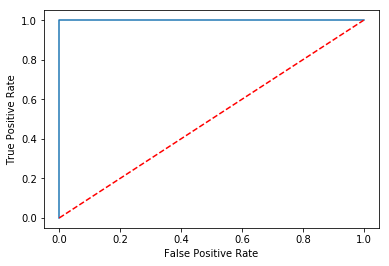

Area under the curve for ROC Curve above is 1.0


In [44]:
print("Train")
print("")
print("Average Accuracy for Semi-Supervised Learning: " + str(np.mean(accuracy_train_list_semi)))
print("Average Precision for Semi-Supervised Learning: " + str(np.mean(precision_train_list_semi)))
print("Average Recall for Semi-Supervised Learning: " + str(np.mean(recall_train_list_semi)))
print("Average F-score for Semi-Supervised Learning: " + str(np.mean(f1_train_list_semi)))
print("Average AUC for Semi-Supervised Learning: " + str(np.mean(roc_score_train_list_semi)))
print("")

print("Sample Run for Train")
print("")
conf_matrix_train = confusion_matrix(lb.fit_transform(new_labeled_y), lb.fit_transform(preds_semi_train))
print("Confusion Matrix")
print(conf_matrix_train)
fpr_train, tpr_train, thresh_train = roc_curve(lb.fit_transform(new_labeled_y), lb.fit_transform(preds_semi_train))
plt.figure() 
plt.plot(fpr_train, tpr_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
roc_score_train = roc_auc_score(lb.fit_transform(new_labeled_y), lb.fit_transform(preds_semi_train))
print("Area under the curve for ROC Curve above is " + str(roc_score_train))

Test

Accuracy: 0.910914454277
Precision: 0.836689766395
Recall: 0.97037037037
F-score: 0.897542973816
AUC: 0.920969498911

Sample Run for Test: 

Confusion Matrix
[[44  1]
 [11 57]]


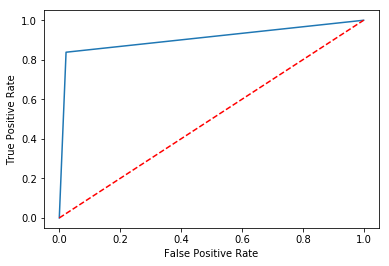

Area under the curve for ROC Curve above is 0.908006535948


In [45]:
print("Test")
print("")
print("Accuracy: " + str(np.mean(accuracy_test_list_semi)))
print("Precision: " + str(np.mean(precision_test_list_semi)))
print("Recall: " + str(np.mean(recall_test_list_semi)))
print("F-score: " + str(np.mean(f1_test_list_semi)))
print("AUC: " + str(np.mean(roc_score_test_list_semi)))
print("")

print("Sample Run for Test: ")
print("")
conf_matrix_test = confusion_matrix(lb.fit_transform(y_semi_data_test), lb.fit_transform(preds_semi_test))
print("Confusion Matrix")
print(conf_matrix_test)
fpr_test, tpr_test, thresh_test = roc_curve(lb.fit_transform(y_semi_data_test), lb.fit_transform(preds_semi_test))
plt.figure() 
plt.plot(fpr_test, tpr_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
roc_score_test = roc_auc_score(lb.fit_transform(y_semi_data_test), lb.fit_transform(preds_semi_test))
print("Area under the curve for ROC Curve above is " + str(roc_score_test))

- iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

    - A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

In [46]:
from sklearn.cluster import KMeans 

X_data = df.drop([0, 1], axis = 1)
y_data = df.iloc[:,1]

In [47]:
kmeans_k2 = KMeans(n_clusters = 2, init = 'random', n_init = 100).fit(X_data)
clusters = kmeans_k2.labels_ 
cluster0 = np.argwhere(clusters == 0)
cluster1 = np.argwhere(clusters == 1)
kmeans_k2.labels_ 

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0,

- With K-means algorithm, it is not entirely possible to avoid local minima since it requires you to iterate over all possible clusterings: if you have the objective function the same is true. You could iterate over all solutions and maximize the objective function, but the number of iterations is exponential in size of the data set https://stats.stackexchange.com/questions/48757/why-doesnt-k-means-give-the-global-minimum). However, there are some "hacks" that can be applied to minimize the chances of getting one. For example, by setting the sklearn's KMeans parameter, n_init = 100, it runs K-means multiple times and then chooses the run that gives the lowest error. So, if you run this k^n times, it will choose the best solution and will guarentee you'll find a global minima, but it is too time consuming to be used for pratical puposes (https://stackoverflow.com/questions/43789602/avoiding-local-minima-when-using-kmeans). 

- 
    - B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

In [49]:
from sklearn.cluster import KMeans 

accuracy_train_list_uns = [] 
precision_train_list_uns = [] 
recall_train_list_uns = [] 
f1_train_list_uns = [] 
roc_score_train_list_uns = [] 

for uns_time in range(30):
    X_data = df.drop([0, 1], axis = 1)
    y_data = df.iloc[:,1]
    
    X_test_uns = X_data.iloc[:114]
    y_test_uns = y_data.iloc[:114]
    X_train_uns = X_data.iloc[114:]
    y_train_uns = y_data.iloc[114:]
    
    kmeans_k2 = KMeans(n_clusters = 2, init = 'random', n_init = 100).fit(X_data)
    clusters = kmeans_k2.labels_ 
    cluster0 = np.argwhere(clusters == 0)
    cluster1 = np.argwhere(clusters == 1)
    #kmeans_k2.labels_ 
    
    # B. 
    d1 = kmeans_k2.transform(X_data)[:, 1]
    d0 = kmeans_k2.transform(X_data)[:, 0]
    ind0 = np.argsort(d0)[::-1][:30]
    ind1 = np.argsort(d1)[::-1][:30]
    
    cluster0_y = y_data.iloc[ind0.ravel()]
    cluster0_y_class = np.argmax(cluster0_y.value_counts())
    cluster1_y = y_data.iloc[ind1.ravel()]
    cluster1_y_class = np.argmax(cluster1_y.value_counts())
    
    kmeans_classifier = [] 
    for indices in range(455):
        if indices in cluster0: 
            kmeans_classifier.append(cluster0_y_class)
        else: 
            kmeans_classifier.append(cluster1_y_class)
            
    preds_uns_train = pd.Series(kmeans_classifier)
    true_y_uns_train = y_train_uns
    
    # accuracy 
    accuracy_train_uns = accuracy_score(true_y_uns_train, preds_uns_train)
    accuracy_train_list_uns.append(accuracy_train_uns)
    
    #precision
    precision_train_uns = precision_score(true_y_uns_train, preds_uns_train, average = "binary", pos_label='B')
    precision_train_list_uns.append(precision_train_uns)
    
    #recall 
    recall_train_uns = recall_score(true_y_uns_train, preds_uns_train, average = "binary", pos_label='B')
    recall_train_list_uns.append(recall_train_uns)
    
    #f-score
    f1_train_uns = f1_score(true_y_uns_train, preds_uns_train, average = "binary", pos_label='B')
    f1_train_list_uns.append(f1_train_uns)
    
    #auc 
    roc_score_train_uns = roc_auc_score(lb.fit_transform(true_y_uns_train), lb.fit_transform(preds_uns_train))
    roc_score_train_list_uns.append(roc_score_train_uns)

Train

Average Accuracy for Unsupervised Learning: 0.397802197802
Average Precision for Unsupervised Learning: 0.663716814159
Average Recall for Unsupervised Learning: 0.24115755627
Average F-score for Unsupervised Learning: 0.353773584906
Average AUC for Unsupervised Learning: 0.488634333691

Sample Run for Train

Confusion Matrix
[[ 75 236]
 [ 38 106]]


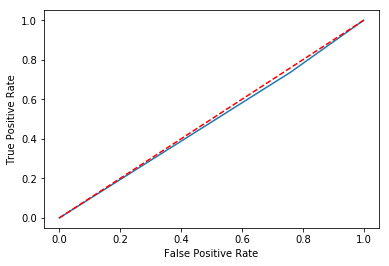

Area under the curve for ROC Curve above is 0.488634333691


In [51]:
print("Train")
print("")
print("Average Accuracy for Unsupervised Learning: " + str(np.mean(accuracy_train_list_uns)))
print("Average Precision for Unsupervised Learning: " + str(np.mean(precision_train_list_uns)))
print("Average Recall for Unsupervised Learning: " + str(np.mean(recall_train_list_uns)))
print("Average F-score for Unsupervised Learning: " + str(np.mean(f1_train_list_uns)))
print("Average AUC for Unsupervised Learning: " + str(np.mean(roc_score_train_list_uns)))
print("")

print("Sample Run for Train")
print("")
conf_matrix_train = confusion_matrix(lb.fit_transform(true_y_uns_train), lb.fit_transform(preds_uns_train))
print("Confusion Matrix")
print(conf_matrix_train)
fpr_train, tpr_train, thresh_train = roc_curve(lb.fit_transform(true_y_uns_train), lb.fit_transform(preds_uns_train))
plt.figure() 
plt.plot(fpr_train, tpr_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
roc_score_train = roc_auc_score(lb.fit_transform(true_y_uns_train), lb.fit_transform(preds_uns_train))
print("Area under the curve for ROC Curve above is " + str(roc_score_train))

- 
    - C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [58]:
accuracy_test_list_uns = [] 
precision_test_list_uns = [] 
recall_test_list_uns = [] 
f1_test_list_uns = [] 
roc_score_test_list_uns = [] 

for test_uns in range(30):
    X_data = df.drop([0, 1], axis = 1)
    y_data = df.iloc[:,1]
    
    X_test_uns = X_data.iloc[:114]
    y_test_uns = y_data.iloc[:114]
    
    kmeans_k2 = KMeans(n_clusters = 2, init = 'random', n_init = 100).fit(X_test_uns)
    clusters = kmeans_k2.labels_ 
    cluster0 = np.argwhere(clusters == 0)
    cluster1 = np.argwhere(clusters == 1)
    #kmeans_k2.labels_ 
    
    d1 = kmeans_k2.transform(X_test_uns)[:, 1]
    d0 = kmeans_k2.transform(X_test_uns)[:, 0]
    ind0 = np.argsort(d0)[::-1][:30]
    ind1 = np.argsort(d1)[::-1][:30]
    
    cluster0_y = y_test_uns.iloc[ind0.ravel()]
    cluster0_y_class = np.argmax(cluster0_y.value_counts())
    cluster1_y = y_test_uns.iloc[ind1.ravel()]
    cluster1_y_class = np.argmax(cluster1_y.value_counts())
    
    kmeans_classifier_test = [] 
    for indices_test in range(455, 569):
        if indices_test in cluster0: 
            kmeans_classifier_test.append(cluster0_y_class)
        else: 
            kmeans_classifier_test.append(cluster1_y_class)
            
    preds_uns_test = pd.Series(kmeans_classifier_test)
    true_y_uns_test = y_test_uns
    
    # accuracy 
    accuracy_test_uns = accuracy_score(true_y_uns_test, preds_uns_test)
    accuracy_test_list_uns.append(accuracy_test_uns)
    
    #precision
    precision_test_uns = precision_score(true_y_uns_test, preds_uns_test, average = "binary", pos_label='B')
    precision_test_list_uns.append(precision_test_uns)
    
    #recall 
    recall_test_uns = recall_score(true_y_uns_test, preds_uns_test, average = "binary", pos_label='B')
    recall_test_list_uns.append(recall_test_uns)
    
    #f-score
    f1_test_uns = f1_score(true_y_uns_test, preds_uns_test, average = "binary", pos_label='B')
    f1_test_list_uns.append(f1_test_uns)
    
    #auc 
    roc_score_test_uns = roc_auc_score(lb.fit_transform(true_y_uns_test), lb.fit_transform(preds_uns_test))
    roc_score_test_list_uns.append(roc_score_test_uns)

Test

Average Accuracy for Unsupervised Learning: 0.5
Average Precision for Unsupervised Learning: 0.201754385965
Average Recall for Unsupervised Learning: 0.5
Average F-score for Unsupervised Learning: 0.2875
Average AUC for Unsupervised Learning: 0.5

Sample Run for Test

Confusion Matrix
[[46  0]
 [68  0]]


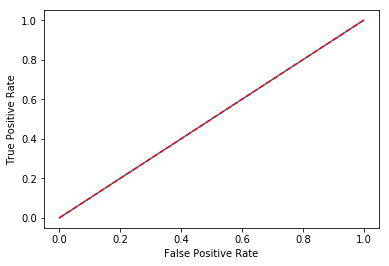

Area under the curve for ROC Curve above is 0.5


In [59]:
print("Test")
print("")
print("Average Accuracy for Unsupervised Learning: " + str(np.mean(accuracy_test_list_uns)))
print("Average Precision for Unsupervised Learning: " + str(np.mean(precision_test_list_uns)))
print("Average Recall for Unsupervised Learning: " + str(np.mean(recall_test_list_uns)))
print("Average F-score for Unsupervised Learning: " + str(np.mean(f1_test_list_uns)))
print("Average AUC for Unsupervised Learning: " + str(np.mean(roc_score_test_list_uns)))
print("")

print("Sample Run for Test")
print("")
conf_matrix_train = confusion_matrix(lb.fit_transform(true_y_uns_test), lb.fit_transform(preds_uns_test))
print("Confusion Matrix")
print(conf_matrix_train)
fpr_train, tpr_train, thresh_train = roc_curve(lb.fit_transform(true_y_uns_test), lb.fit_transform(preds_uns_test))
plt.figure() 
plt.plot(fpr_train, tpr_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
roc_score_train = roc_auc_score(lb.fit_transform(true_y_uns_test), lb.fit_transform(preds_uns_test))
print("Area under the curve for ROC Curve above is " + str(roc_score_train))

- iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel.

- Spectral Clustering: 

- 
    - A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

In [166]:
X_data = df.drop([0, 1], axis = 1)
X_data = preprocessing.normalize(X_data)
y_data = df.iloc[:,1]
    
X_test_uns = pd.DataFrame(X_data).iloc[:114]
y_test_uns = y_data.iloc[:114]
X_train_uns = pd.DataFrame(X_data).iloc[114:]
y_train_uns = y_data.iloc[114:]
    
spec_clustering_train = SpectralClustering(n_clusters=2, n_init = 100).fit(X_train_uns)
spec_clustering_train.labels_ 

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0,

- 
    - B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

In [164]:
from sklearn.cluster import SpectralClustering 

accuracy_train_list_uns = [] 
precision_train_list_uns = [] 
recall_train_list_uns = [] 
f1_train_list_uns = [] 
roc_score_train_list_uns = [] 
df = wdbc_data 

for uns_time1 in range(30):
    X_data = df.drop([0, 1], axis = 1)
    X_data = preprocessing.normalize(X_data)
    y_data = df.iloc[:,1]
    
    X_test_uns = pd.DataFrame(X_data).iloc[:114]
    y_test_uns = y_data.iloc[:114]
    X_train_uns = pd.DataFrame(X_data).iloc[114:]
    y_train_uns = y_data.iloc[114:]
    
    
    spec_clustering_train = SpectralClustering(n_clusters=2, n_init = 100).fit(X_train_uns)
    
    clusters = spec_clustering_train.labels_ 
    cluster0 = np.argwhere(clusters == 0)
    cluster1 = np.argwhere(clusters == 1)
    
    ind0 = cluster0
    ind1 = cluster1
    
    cluster0_y = y_train_uns.iloc[ind0.ravel()]
    cluster0_y_class = np.argmax(cluster0_y.value_counts())
    cluster1_y = y_train_uns.iloc[ind1.ravel()]
    cluster1_y_class = np.argmax(cluster1_y.value_counts())
    
    
    spec_classifier = [] 
    for indices in range(455):
        if indices in cluster0: 
            spec_classifier.append(cluster0_y_class)
        else: 
            spec_classifier.append(cluster1_y_class)
    
    preds_uns_train = pd.Series(spec_classifier)
    true_y_uns_train = y_train_uns
    
    
    # accuracy 
    accuracy_train_uns = accuracy_score(true_y_uns_train, preds_uns_train)
    accuracy_train_list_uns.append(accuracy_train_uns)
    
    #precision
    precision_train_uns = precision_score(true_y_uns_train, preds_uns_train, average = "binary", pos_label='B')
    precision_train_list_uns.append(precision_train_uns)
    
    #recall 
    recall_train_uns = recall_score(true_y_uns_train, preds_uns_train, average = "binary", pos_label='B')
    recall_train_list_uns.append(recall_train_uns)
    
    #f-score
    f1_train_uns = f1_score(true_y_uns_train, preds_uns_train, average = "binary", pos_label='B')
    f1_train_list_uns.append(f1_train_uns)
    
    #auc 
    roc_score_train_uns = roc_auc_score(lb.fit_transform(true_y_uns_train), lb.fit_transform(preds_uns_train))
    roc_score_train_list_uns.append(roc_score_train_uns)

Train

Average Accuracy for Spectral Clustering: 0.898901098901
Average Precision for Spectral Clustering: 0.893175074184
Average Recall for Spectral Clustering: 0.967845659164
Average F-score for Spectral Clustering: 0.929012345679
Average AUC for Spectral Clustering: 0.858922829582

Sample Run for Train

Confusion Matrix
[[301  10]
 [ 36 108]]


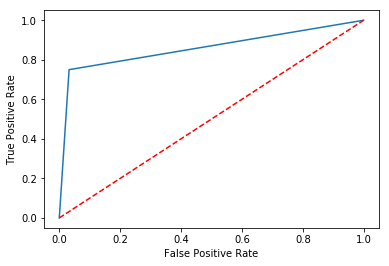

Area under the curve for ROC Curve above is 0.858922829582


In [162]:
print("Train")
print("")
print("Average Accuracy for Spectral Clustering: " + str(np.mean(accuracy_train_list_uns)))
print("Average Precision for Spectral Clustering: " + str(np.mean(precision_train_list_uns)))
print("Average Recall for Spectral Clustering: " + str(np.mean(recall_train_list_uns)))
print("Average F-score for Spectral Clustering: " + str(np.mean(f1_train_list_uns)))
print("Average AUC for Spectral Clustering: " + str(np.mean(roc_score_train_list_uns)))
print("")

print("Sample Run for Train")
print("")
conf_matrix_train = confusion_matrix(lb.fit_transform(true_y_uns_train), lb.fit_transform(preds_uns_train))
print("Confusion Matrix")
print(conf_matrix_train)
fpr_train, tpr_train, thresh_train = roc_curve(lb.fit_transform(true_y_uns_train), lb.fit_transform(preds_uns_train))
plt.figure() 
plt.plot(fpr_train, tpr_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
roc_score_train = roc_auc_score(lb.fit_transform(true_y_uns_train), lb.fit_transform(preds_uns_train))
print("Area under the curve for ROC Curve above is " + str(roc_score_train))

- 
    - C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [173]:
accuracy_test_list_uns = [] 
precision_test_list_uns = [] 
recall_test_list_uns = [] 
f1_test_list_uns = [] 
roc_score_test_list_uns = [] 
df = wdbc_data 

for uns_time1 in range(30):
    X_data = df.drop([0, 1], axis = 1)
    X_data = preprocessing.normalize(X_data)
    y_data = df.iloc[:,1]
    
    X_test_uns = pd.DataFrame(X_data).iloc[:114]
    y_test_uns = y_data.iloc[:114]
    X_train_uns = pd.DataFrame(X_data).iloc[114:]
    y_train_uns = y_data.iloc[114:]
    
    
    spec_clustering_train = SpectralClustering(n_clusters=2, n_init = 100).fit(X_test_uns)
    
    clusters = spec_clustering_train.labels_ 
    cluster0 = np.argwhere(clusters == 0)
    cluster1 = np.argwhere(clusters == 1)
    
    ind0 = cluster0
    ind1 = cluster1
    
    cluster0_y = y_test_uns.iloc[ind0.ravel()]
    cluster0_y_class = np.argmax(cluster0_y.value_counts())
    cluster1_y = y_test_uns.iloc[ind1.ravel()]
    cluster1_y_class = np.argmax(cluster1_y.value_counts())
    
    
    spec_classifier = [] 
    for indices in range(455,569):
        if indices in cluster0: 
            spec_classifier.append(cluster0_y_class)
        else: 
            spec_classifier.append(cluster1_y_class)
    
    preds_uns_train = pd.Series(spec_classifier)
    true_y_uns_train = y_test_uns
    
    
    # accuracy 
    accuracy_test_uns = accuracy_score(true_y_uns_train, preds_uns_train)
    accuracy_test_list_uns.append(accuracy_test_uns)
    
    #precision
    precision_test_uns = precision_score(true_y_uns_train, preds_uns_train, average = "binary", pos_label='B')
    precision_test_list_uns.append(precision_test_uns)
    
    #recall 
    recall_test_uns = recall_score(true_y_uns_train, preds_uns_train, average = "binary", pos_label='B')
    recall_test_list_uns.append(recall_test_uns)
    
    #f-score
    f1_test_uns = f1_score(true_y_uns_train, preds_uns_train, average = "binary", pos_label='B')
    f1_test_list_uns.append(f1_test_uns)
    
    #auc 
    roc_score_test_uns = roc_auc_score(lb.fit_transform(true_y_uns_train), lb.fit_transform(preds_uns_train))
    roc_score_test_list_uns.append(roc_score_test_uns)

Test

Average Accuracy for Spectral Clustering: 0.5
Average Precision for Spectral Clustering: 0.201754385965
Average Recall for Spectral Clustering: 0.5
Average F-score for Spectral Clustering: 0.2875
Average AUC for Spectral Clustering: 0.5

Sample Run for Test

Confusion Matrix
[[46  0]
 [68  0]]


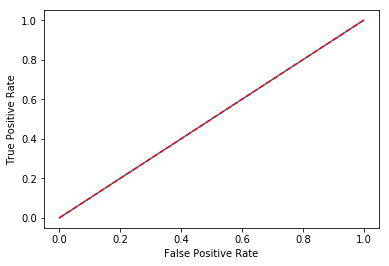

Area under the curve for ROC Curve above is 0.5


In [174]:
print("Test")
print("")
print("Average Accuracy for Spectral Clustering: " + str(np.mean(accuracy_test_list_uns)))
print("Average Precision for Spectral Clustering: " + str(np.mean(precision_test_list_uns)))
print("Average Recall for Spectral Clustering: " + str(np.mean(recall_test_list_uns)))
print("Average F-score for Spectral Clustering: " + str(np.mean(f1_test_list_uns)))
print("Average AUC for Spectral Clustering: " + str(np.mean(roc_score_test_list_uns)))
print("")

print("Sample Run for Test")
print("")
conf_matrix_train = confusion_matrix(lb.fit_transform(true_y_uns_train), lb.fit_transform(preds_uns_train))
print("Confusion Matrix")
print(conf_matrix_train)
fpr_train, tpr_train, thresh_train = roc_curve(lb.fit_transform(true_y_uns_train), lb.fit_transform(preds_uns_train))
plt.figure() 
plt.plot(fpr_train, tpr_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
roc_score_train = roc_auc_score(lb.fit_transform(true_y_uns_train), lb.fit_transform(preds_uns_train))
print("Area under the curve for ROC Curve above is " + str(roc_score_train))

- v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled. One can expects that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

    - For this part of question, I assumed that we are comparing the three machine learning algorithms based on the results for the reported average accuracy, precision, recall, F-score and AUC.
    - By comparing the reported average of the Monte Carlo Simulation of 30 times, the supervised learning algorithm works better than the semi-supervised learning algorithm and the unsupervised algorithm. 
    - When comparing between the semi-supervised learning algorithm and unsupervised algorithm, semi-supervised learning algorithm works better as unsupervised algorithm performs poorly, to the point that it would be better of tossing a coin for a classifier when comparing the results in terms of the AUC.

#### 2. Active Learning Using Support Vector Machines

(a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem

In [64]:
banknote_df = df=pd.read_csv("data_banknote_authentication.txt",sep=",",header=None, 
               names=['variance','skewness','curtosis','entropy','class'])
banknote_df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [65]:
train_df, test_df = train_test_split(banknote_df, test_size=472)

X_train = train_df.iloc[:,:4]
y_train = train_df['class']

X_test = test_df.iloc[:,:4]
y_test = test_df['class']

print("Size of train data set: " + str(train_df.shape))
print("Size of test data set: " + str(test_df.shape))

Size of train data set: (900, 5)
Size of test data set: (472, 5)


(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

- i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation. Repeat this process by adding 10 other randomly
selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [67]:
# first initialization for first 10 

k_folds = KFold(10) 
parameters={'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
svm_l1 = LinearSVC(penalty = 'l1', dual = False)

gsc = GridSearchCV(svm_l1, parameters, cv = k_folds)

initial_sample = train_df.sample(n=10)
initial_sample_X = initial_sample.iloc[:,:4]
initial_sample_y = initial_sample['class']
train_subset_890 = train_df.drop(initial_sample.index)

gsc.fit(initial_sample_X, initial_sample_y)

test_error = [] 
preds_test_initial = gsc.predict(X_test)
accuracy_test_initial = accuracy_score(y_test, preds_test_initial)
test_error.append(accuracy_test_initial)

In [68]:
for each_run in range(89):
    each_sample = train_subset_890.sample(n=10)
    train_subset_890 = train_subset_890.drop(each_sample.index)
    
    each_sample_X = initial_sample.iloc[:,:4]
    each_sample_y = initial_sample['class']
    
    frames_X = [initial_sample_X, each_sample_X]
    initial_sample_X = pd.concat(frames_X, axis = 0)
    frames_y = [pd.DataFrame(initial_sample_y), pd.DataFrame(each_sample_y)]
    initial_sample_y = pd.concat(frames_y, axis = 0)
    
    gsc.fit(initial_sample_X, initial_sample_y)
    each_preds = gsc.predict(X_test)
    each_accuracy = accuracy_score(y_test, each_preds)
    test_error.append(each_accuracy)

In [70]:
print("Average Test Error for Passive Learning: " + str(1 - np.mean(test_error))) 

Average Test Error for Passive Learning: 0.08815913371


- ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [76]:
# initialize 
k_folds = KFold(10) 
parameters={'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
svm_l1 = LinearSVC(penalty = 'l1', dual = False)

gsc = GridSearchCV(svm_l1, parameters, cv = k_folds)

initial_sample = train_df.sample(n=10)
initial_sample_X = initial_sample.iloc[:,:4]
initial_sample_y = initial_sample['class']
train_subset_890 = train_df.drop(initial_sample.index)

gsc.fit(initial_sample_X, initial_sample_y)

# new model 
c_parameter = gsc.best_params_.get('C')
model_active = LinearSVC(penalty = 'l1', dual = False, C = c_parameter)
model_active.fit(initial_sample_X, initial_sample_y)

test_error_active = [] 
preds_test_initial_active = model_active.predict(X_test)
accuracy_test_initial_active = accuracy_score(y_test, preds_test_initial_active)
test_error_active.append(accuracy_test_initial_active)

In [77]:
for active_run in range(89):
    # retain index for calculating distance
    active_dist_index = pd.DataFrame(train_subset_890.index.values, columns = ['ind'])
    
    # calculate the distance 
    y = model_active.decision_function(train_subset_890.iloc[:,:4])
    w_norm = np.linalg.norm(model_active.coef_)
    dist = y / w_norm
    dist = pd.DataFrame(np.abs(dist)) # abs value to compare 
    
    # retain index and distance 
    dist_and_index_frame = [active_dist_index, dist]
    dist_and_index = pd.concat(dist_and_index_frame, axis = 1)
    dist_and_index = dist_and_index.set_index('ind')
    
    # choose the closest 10 
    closest_10 = dist_and_index.sort_values(by=0)[:10]
    
    # select 10 that will be added from the subset of the train 
    selected_10 = train_subset_890[train_subset_890.index.isin(closest_10.index)]
    selected_10_X = selected_10.iloc[:,:4]
    selected_10_y = selected_10['class']
    
    frames_X = [initial_sample_X, selected_10_X]
    initial_sample_X = pd.concat(frames_X, axis = 0)
    frames_y = [initial_sample_y, selected_10_y]
    initial_sample_y = pd.concat(frames_y, axis = 0)
    
    # drop the closest 10 from subset 
    train_subset_890 = train_subset_890.drop(closest_10.index)
    
    model_active.fit(initial_sample_X, initial_sample_y)
    preds_test_initial_active = model_active.predict(X_test)
    accuracy_test_initial_active = accuracy_score(y_test, preds_test_initial_active)
    test_error_active.append(accuracy_test_initial_active)

In [78]:
print("Average Test Error for Active Learning: " + str(1-np.mean(test_error_active)))

Average Test Error for Active Learning: 0.0107815442561


(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

*** Please note that I used n_samples = 30 in each batch since it was giving errors that only one class was selected ***

In [147]:
monte_test_error = [] 

In [148]:
for monte_passive in range(50):
    # first initialization for first 10 
    k_folds = KFold(10) 
    parameters={'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
    svm_l1 = LinearSVC(penalty = 'l1', dual = False)
    
    gsc = GridSearchCV(svm_l1, parameters, cv = k_folds)
    
    initial_sample = train_df.sample(n=30)
    initial_sample_X = initial_sample.iloc[:,:4]
    initial_sample_y = initial_sample['class']
    train_subset_890 = train_df.drop(initial_sample.index)
    
    gsc.fit(initial_sample_X, initial_sample_y)
    
    # new model 
    c_parameter = gsc.best_params_.get('C')
    model_passive = LinearSVC(penalty = 'l1', dual = False, C = c_parameter)
    model_passive.fit(initial_sample_X, initial_sample_y)
    
    test_error = [] 
    preds_test_initial = model_passive.predict(X_test)
    accuracy_test_initial = accuracy_score(y_test, preds_test_initial)
    test_error.append(accuracy_test_initial)
    
    for each_run in range(29):
        each_sample = train_subset_890.sample(n=30)
        train_subset_890 = train_subset_890.drop(each_sample.index)
        
        each_sample_X = initial_sample.iloc[:,:4]
        each_sample_y = initial_sample['class']
        
        frames_X = [initial_sample_X, each_sample_X]
        initial_sample_X = pd.concat(frames_X, axis = 0)
        frames_y = [pd.DataFrame(initial_sample_y), pd.DataFrame(each_sample_y)]
        initial_sample_y = pd.concat(frames_y, axis = 0)
        
        model_passive.fit(initial_sample_X, initial_sample_y)
        each_preds = model_passive.predict(X_test)
        each_accuracy = accuracy_score(y_test, each_preds)
        test_error.append(each_accuracy)
    monte_test_error.append(test_error)

In [149]:
monte_average_passive = [1-(sum(x)/50) for x in zip(*monte_test_error)]

In [151]:
monte_test_error_active = [] 

In [152]:
for monte_active in range(50):

    # initialize 
    k_folds = KFold(10) 
    parameters={'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
    svm_l1 = LinearSVC(penalty = 'l1', dual = False)
    
    gsc = GridSearchCV(svm_l1, parameters, cv = k_folds)
    
    initial_sample = train_df.sample(n=30)
    initial_sample_X = initial_sample.iloc[:,:4]
    initial_sample_y = initial_sample['class']
    train_subset_890 = train_df.drop(initial_sample.index)
    
    gsc.fit(initial_sample_X, initial_sample_y)
    
    # new model 
    c_parameter = gsc.best_params_.get('C')
    model_active = LinearSVC(penalty = 'l1', dual = False, C = c_parameter)
    model_active.fit(initial_sample_X, initial_sample_y)
    
    test_error_active = [] 
    preds_test_initial_active = model_active.predict(X_test)
    accuracy_test_initial_active = accuracy_score(y_test, preds_test_initial_active)
    test_error_active.append(accuracy_test_initial_active)
    
    for active_run in range(29):
        # retain index for calculating distance
        active_dist_index = pd.DataFrame(train_subset_890.index.values, columns = ['ind'])
        
        # calculate the distance 
        y = model_active.decision_function(train_subset_890.iloc[:,:4])
        w_norm = np.linalg.norm(model_active.coef_)
        dist = y / w_norm
        dist = pd.DataFrame(np.abs(dist)) # abs value to compare 
        
        # retain index and distance 
        dist_and_index_frame = [active_dist_index, dist]
        dist_and_index = pd.concat(dist_and_index_frame, axis = 1)
        dist_and_index = dist_and_index.set_index('ind')
        
        # choose the closest 10 
        closest_10 = dist_and_index.sort_values(by=0)[:10]
        
        # select 10 that will be added from the subset of the train 
        selected_10 = train_subset_890[train_subset_890.index.isin(closest_10.index)]
        selected_10_X = selected_10.iloc[:,:4]
        selected_10_y = selected_10['class']
        
        frames_X = [initial_sample_X, selected_10_X]
        initial_sample_X = pd.concat(frames_X, axis = 0)
        frames_y = [initial_sample_y, selected_10_y]
        initial_sample_y = pd.concat(frames_y, axis = 0)
        
        # drop the closest 10 from subset 
        train_subset_890 = train_subset_890.drop(closest_10.index)
        
        model_active.fit(initial_sample_X, initial_sample_y)
        preds_test_initial_active = model_active.predict(X_test)
        accuracy_test_initial_active = accuracy_score(y_test, preds_test_initial_active)
        test_error_active.append(accuracy_test_initial_active)
    monte_test_error_active.append(test_error_active)

In [153]:
monte_average_active = [1 - (sum(x)/50) for x in zip(*monte_test_error_active)]

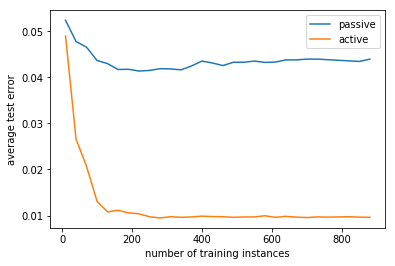

In [154]:
num_train = range(10, 901, 30)

plt.plot(num_train, monte_average_passive, label='passive')
plt.plot(num_train, monte_average_active, label='active')
plt.xlabel('number of training instances')
plt.ylabel('average test error')
plt.legend()
plt.show()

- Conclusion: 
    - Upon observing the results for this part of the exercise, we can see active learning decreases more rapidly 
    - As number of training instances, n_samples, increase, active learning seems to perform better since it gives less average test error
    - The active learning curve is more smoother than the passive learning one which seems to indicate a more stable model.
    - Overall, in baiscally all of the instances, active learning seems to perform significantly better than passive learning in terms of average test error vs. as the number of training instances increase